# last layer embedding average

In [1]:
import sys
import os 
sys.path.append(os.path.dirname(sys.path[0]) + '/src')
import pandas as pd
from ast import literal_eval
from models.bert_rep import BertRep

train_df = pd.read_csv('../data/processed/sentipolc/subj_rep_train.csv', converters={'rep': literal_eval, 'spans': literal_eval})
train_df = train_df.head(10)
bert_rep = BertRep()
train_df['hs'] = train_df['spans'].map(bert_rep.four_last_hidden_state_concat).values.tolist()

torch.Size([2, 512, 3072])
torch.Size([2, 3072])
torch.Size([3072])
torch.Size([1, 512, 3072])
torch.Size([1, 3072])
torch.Size([3072])
torch.Size([1, 512, 3072])
torch.Size([1, 3072])
torch.Size([3072])
torch.Size([1, 512, 3072])
torch.Size([1, 3072])
torch.Size([3072])
torch.Size([1, 512, 3072])
torch.Size([1, 3072])
torch.Size([3072])
torch.Size([2, 512, 3072])
torch.Size([2, 3072])
torch.Size([3072])
torch.Size([2, 512, 3072])
torch.Size([2, 3072])
torch.Size([3072])
torch.Size([1, 512, 3072])
torch.Size([1, 3072])
torch.Size([3072])
torch.Size([1, 512, 3072])
torch.Size([1, 3072])
torch.Size([3072])
torch.Size([1, 512, 3072])
torch.Size([1, 3072])
torch.Size([3072])


In [2]:
test_df = pd.read_csv('../data/processed/sentipolc/subj_rep_test.csv', converters={'rep': literal_eval, 'spans': literal_eval})
test_df = test_df.head(10)
test_df['hs'] = test_df['spans'].map(bert_rep.last_hidden_state_concat).values.tolist()

In [3]:
X_train = train_df['hs'].to_list()
y_train = train_df['iro'].to_list()

X_test = test_df['hs'].to_list()
y_test = test_df['iro'].to_list()

In [4]:
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {'C': [ 0.01,0.1],
              'gamma': ['scale'],
              'degree': [3],
              'kernel': ['poly']}


grid = GridSearchCV(svm.SVC(class_weight = 'balanced'), param_grid, refit = True, verbose = 3, scoring=make_scorer(f1_score, average='macro'), cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

y_pred = grid.predict(X_test)

pr_iro = precision_score(y_test, y_pred, pos_label=1)
pr_no_iro = precision_score(y_test, y_pred, pos_label=0)

rec_iro = recall_score(y_test, y_pred, pos_label=1)
rec_no_iro = recall_score(y_test, y_pred, pos_label=0)

f1_iro = f1_score(y_test, y_pred, pos_label=1)
f1_no_iro = f1_score(y_test, y_pred, pos_label=0)
f1_mean = f1_score(y_test, y_pred, average='macro')

acc = accuracy_score(y_test, y_pred,)

print('Precision iro: {0:.3f}'.format(pr_iro))
print('Precision no iro: {0:.3f}'.format(pr_no_iro))
print('Recall iro: {0:.3f}'.format(rec_iro))
print('Recall no_iro: {0:.3f}'.format(rec_no_iro))
print('F1 iro: {0:.3f}'.format(f1_iro))
print('F1 no_iro: {0:.3f}'.format(f1_no_iro))
print('F1 mean: {0:.3f}'.format(f1_mean))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=grid.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=grid.classes_)
disp.plot()
plt.show()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fitting 10 folds for each of 2 candidates, totalling 20 fits
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKEN

KeyboardInterrupt: 

## Subjectivity

In [37]:
X_train = train_df['hs'].to_list()
y_train = train_df['subj'].to_list()

X_test = test_df['hs'].to_list()
y_test = test_df['subj'].to_list()

Fitting 5 folds for each of 120 candidates, totalling 600 fits
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOK

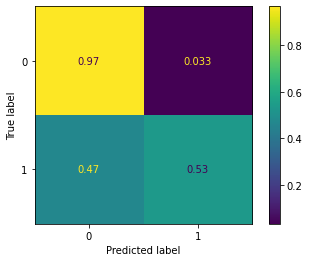

In [38]:
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

param_grid = {'C': [ 0.01, 0.5, 1, 10],
              'gamma': ['scale', 'auto', 0.01, 0.1, 1],
              'degree': [3, 4, 5],
              'kernel': ['poly', 'rbf']}


grid = GridSearchCV(svm.SVC(class_weight = 'balanced'), param_grid, refit = True, verbose = 3, scoring=make_scorer(f1_score, average='macro'), cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

y_pred = grid.predict(X_test)


pr_subj = precision_score(y_test, y_pred, pos_label=1)
pr_obj = precision_score(y_test, y_pred, pos_label=0)

rec_subj = recall_score(y_test, y_pred, pos_label=1)
rec_obj = recall_score(y_test, y_pred, pos_label=0)

f1_subj = f1_score(y_test, y_pred, pos_label=1)
f1_obj = f1_score(y_test, y_pred, pos_label=0)
f1_mean = f1_score(y_test, y_pred, average = 'macro')

acc = accuracy_score(y_test, y_pred,)

print('Precision subj: {0:.3f}'.format(pr_subj))
print('Precision obj: {0:.3f}'.format(pr_obj))
print('Recall subj: {0:.3f}'.format(rec_subj))
print('Recall obj: {0:.3f}'.format(rec_obj))
print('F1 subj: {0:.3f}'.format(f1_subj))
print('F1 obj: {0:.3f}'.format(f1_obj))
print('F1 mean: {0:.3f}'.format((f1_mean)))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=grid.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=grid.classes_)
disp.plot()
plt.show()

## Polarity

In [ ]:

X_train = train_df['hs'].to_list()
y_train = train_df['opos'].to_list()

X_test = test_df['hs'].to_list()
y_test = test_df['opos'].to_list()


In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {'C': [ 0.01,0.1],
              'gamma': ['scale'],
              'degree': [3],
              'kernel': ['poly']}


grid = GridSearchCV(svm.SVC(class_weight = 'balanced'), param_grid, refit = True, verbose = 3, scoring=make_scorer(f1_score, average='macro'), cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

y_pred = grid.predict(X_test)

pr_opos = precision_score(y_test, y_pred, pos_label=1)
pr_no_opos = precision_score(y_test, y_pred, pos_label=0)

rec_opos = recall_score(y_test, y_pred, pos_label=1)
rec_no_opos = recall_score(y_test, y_pred, pos_label=0)

f1_opos = f1_score(y_test, y_pred, pos_label=1)
f1_no_opos = f1_score(y_test, y_pred, pos_label=0)
f1_mean_opos = f1_score(y_test, y_pred, average='macro')

acc = accuracy_score(y_test, y_pred,)

print('Precision iro: {0:.3f}'.format(pr_iro))
print('Precision no iro: {0:.3f}'.format(pr_no_opos))
print('Recall iro: {0:.3f}'.format(rec_opos))
print('Recall no_iro: {0:.3f}'.format(rec_no_opos))
print('F1 iro: {0:.3f}'.format(f1_opos))
print('F1 no_iro: {0:.3f}'.format(f1_no_opos))
print('F1 mean: {0:.3f}'.format(f1_mean_opos))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=grid.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=grid.classes_)
disp.plot()
plt.show()